In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

import cpu_detection as detector
import run_detector as main

In [2]:
# load data
data_dir = 'ub_calls'          # this is the path to your audio files
do_time_expansion = True       # if audio is already time expanded set this to False

# read audio files
audio_files = main.get_audio_files(data_dir)

In [3]:
# load and create the detector    
det_model_file = 'models/detector.npy'
# The parameters are in models/detector_params.json
det_params_file = det_model_file[:-4] + '_params.json'
# Method CPUDetector is in cpu_detection.py
det = detector.CPUDetector(det_model_file, det_params_file)

In [4]:
file_cnt = 5
file_name = audio_files[file_cnt]
file_name_basename = file_name[len(data_dir):]

In [5]:
# read audio file - skip file if can't read it
read_fail, audio, file_dur, samp_rate, samp_rate_orig = main.read_audio(file_name,
                        do_time_expansion, det.chunk_size, det.win_size)

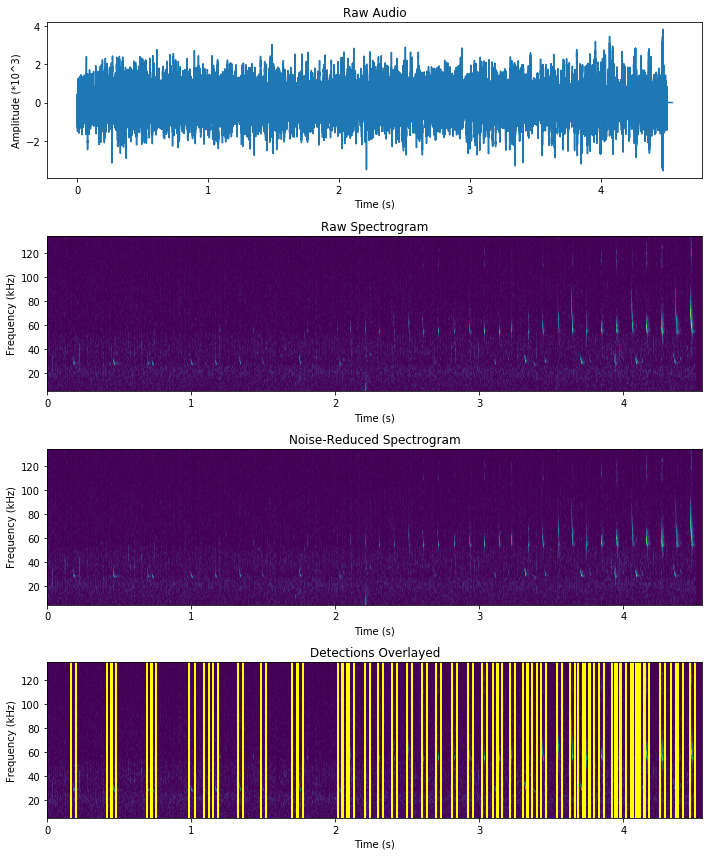

  49 calls found


In [6]:
detection_thresh = 0.35
    
det_time, det_prob  = main.run_model(det, audio, file_dur, samp_rate,
                                detection_thresh, do_time_expansion)

# Calling our method here to plot a figure for each file in the directory
main.plot_calls(audio, samp_rate_orig, det, det_time)

num_calls = len(det_time)
print('  ' + str(num_calls) + ' calls found')

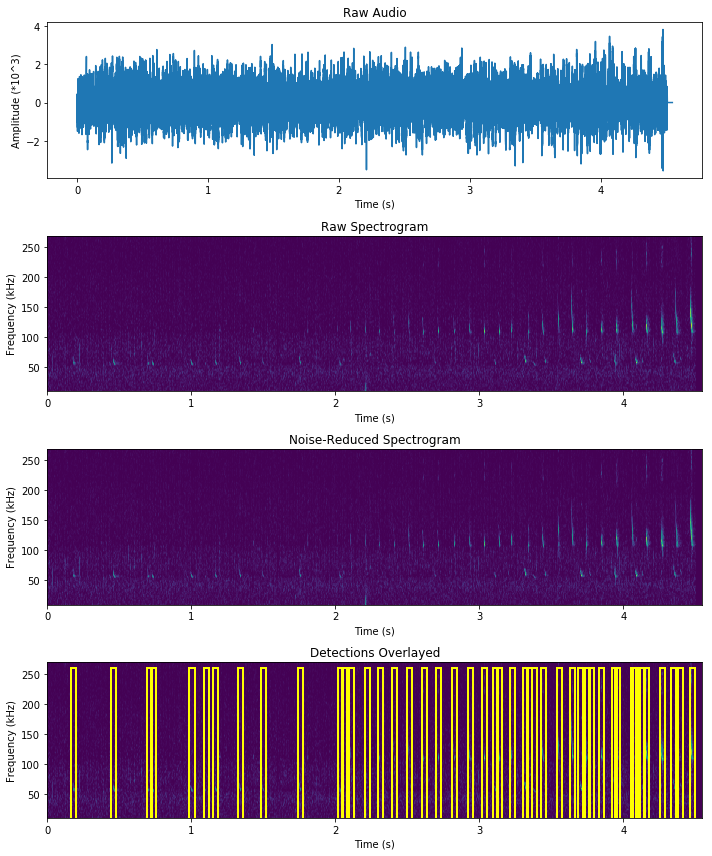

  45 calls found


In [42]:
detection_thresh = 0.65
    
det_time, det_prob  = main.run_model(det, audio, file_dur, samp_rate,
                                detection_thresh, do_time_expansion)

# Calling our method here to plot a figure for each file in the directory
main.plot_calls(audio, samp_rate_orig, det, det_time)

num_calls = len(det_time)
print('  ' + str(num_calls) + ' calls found')

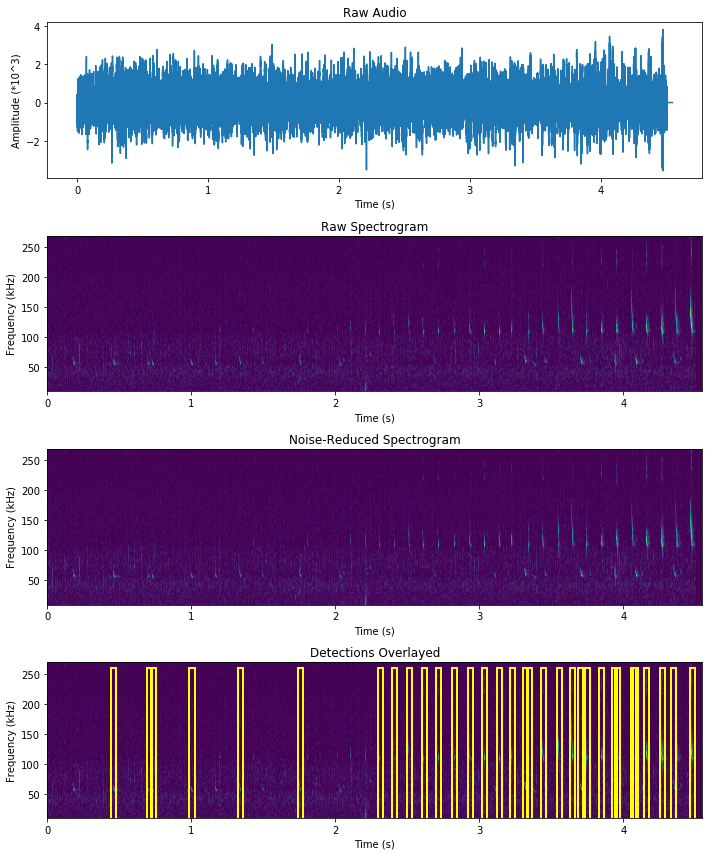

  32 calls found


In [43]:
detection_thresh = 0.95

det_time, det_prob  = main.run_model(det, audio, file_dur, samp_rate,
                                detection_thresh, do_time_expansion)

# Calling our method here to plot a figure for each file in the directory
main.plot_calls(audio, samp_rate_orig, det, det_time)

num_calls = len(det_time)
print('  ' + str(num_calls) + ' calls found')

In [44]:
detection_thresh_arr = np.arange(0, 100, 1.0)/100
num_calls_thresh = np.zeros(100)

for slot, detection_thresh in enumerate(detection_thresh_arr):
    det_time, det_prob  = main.run_model(det, audio, file_dur, samp_rate,
                                detection_thresh, do_time_expansion)
    
    num_calls_thresh[slot] = len(det_time)

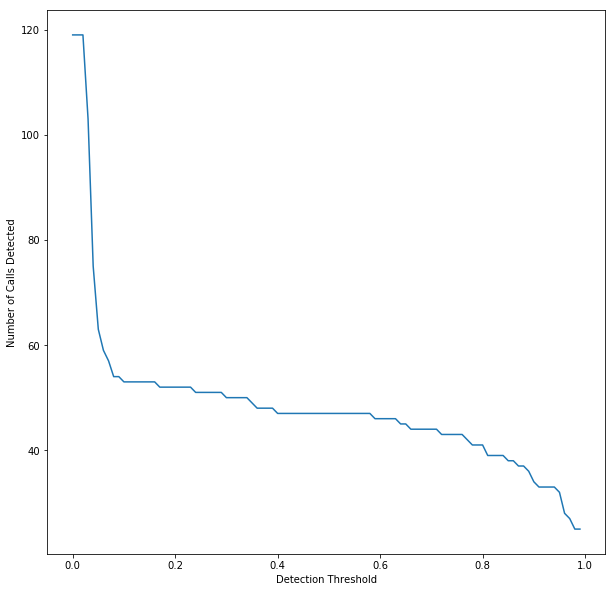

In [45]:
plt.figure(figsize=(10, 10))
plt.plot(detection_thresh_arr, num_calls_thresh)
plt.xlabel("Detection Threshold")
plt.ylabel("Number of Calls Detected")
plt.show()